# Temperature Comparison in Michigan/USA: 2005-2014 vs. 2015

Mandatory Task under "Applied Plotting, Charting & Data Representation in Python" (Coursera - University of Michigan)


These daily climate records for *Ann Arbor, Michigan, United States* comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily).

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Tasks:

1. Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

**ps:** Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

In [7]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# read data and convert to degrees C, there exist numerous TMAX/TMIN for each day, taken by different stations

df = pd.read_csv('NCEI_data.csv')
df['Data_Value'] = df['Data_Value'] * 0.1
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [25]:
# convert Date to datetime type and extract MonthDay for 2005-2014 period

df['Date'] = list(map(pd.to_datetime, df['Date']))
df['MonthDay'] = df.where(df['Date'].dt.year != 2015).dropna()['Date'].dt.strftime('%m-%d')

# drop leap days and find min/max temperature for each day of the year between 2005-2014 (365 data points in total)

x_min = (df.drop(df[(df['MonthDay'] == '02-29') == True].index)
         .loc[df['Element'] == 'TMIN']
         .groupby(['MonthDay'])['Data_Value']
         .min())
x_max = (df.drop(df[(df['MonthDay'] == '02-29') == True].index)
         .loc[df['Element'] == 'TMAX']
         .groupby(['MonthDay'])['Data_Value']
         .max())
x_min = x_min.reset_index()
x_max = x_max.reset_index()

# find min/max temperature values for each day of the year 2015 (365 data points in total)

min2015 = df[(df['Date'].dt.year == 2015)].loc[df['Element'] == 'TMIN'].groupby('Date').min()['Data_Value'].reset_index()
min2015 = min2015.rename(columns= {'Date': 'MonthDay'})
min2015['MonthDay'] = min2015['MonthDay'].dt.strftime('%m-%d')

max2015 = df[(df['Date'].dt.year == 2015)].loc[df['Element'] == 'TMAX'].groupby('Date').max()['Data_Value'].reset_index()
max2015 = max2015.rename(columns= {'Date': 'MonthDay'})
max2015['MonthDay'] = max2015['MonthDay'].dt.strftime('%m-%d')

# find ten year record (2005-2014) record high / low broken in 2015 

broken_min = min2015[(min2015['Data_Value'] < x_min['Data_Value'])]
broken_max = max2015[(max2015['Data_Value'] > x_max['Data_Value'])]

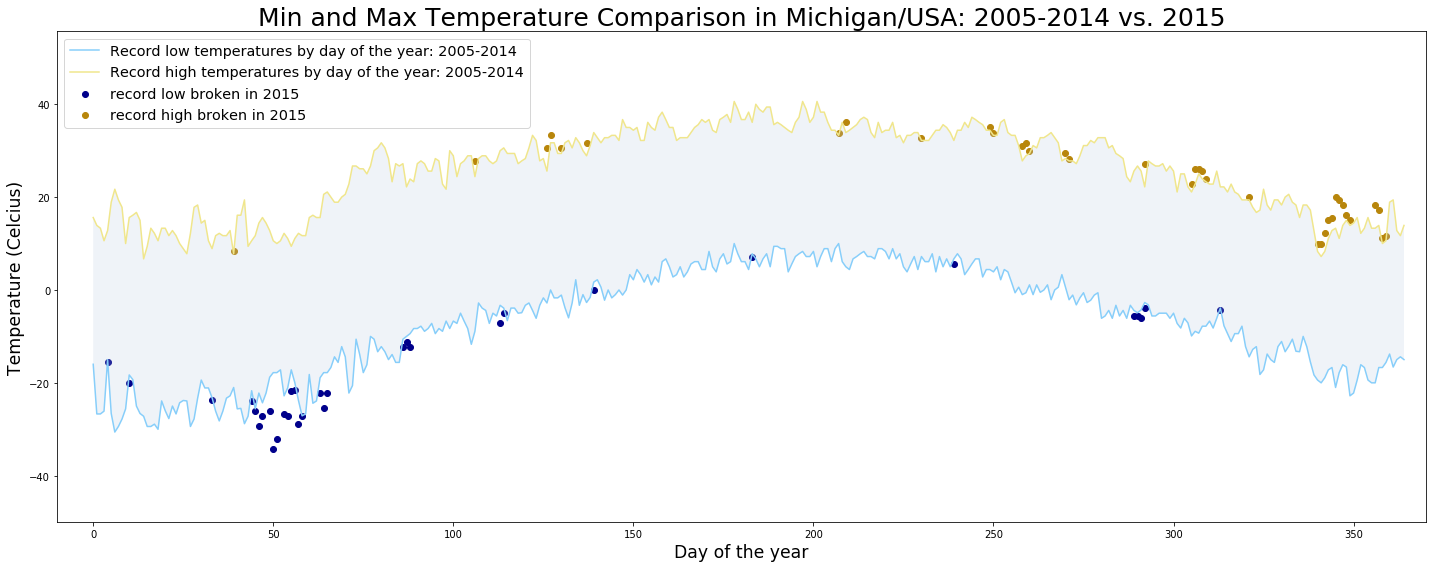

In [26]:
#plot line and scatter graph

plt.figure(111, figsize=(20,8))

plt.plot(x_min['Data_Value'], color='lightskyblue')
plt.plot(x_max['Data_Value'], color='khaki')
plt.scatter(broken_min.index, broken_min.Data_Value, color='darkblue')
plt.scatter(broken_max.index, broken_max.Data_Value, color='darkgoldenrod')

# fill the area between high and low temperature line graphs

plt.gca().fill_between(range(len(x_min['Data_Value'])), 
                       x_min['Data_Value'], x_max['Data_Value'], 
                       facecolor='lightsteelblue', 
                       alpha=0.2)
plt.title('Min and Max Temperature Comparison in Michigan/USA: 2005-2014 vs. 2015', fontsize=25)
plt.legend(['Record low temperatures by day of the year: 2005-2014', 'Record high temperatures by day of the year: 2005-2014', 'record low broken in 2015', 'record high broken in 2015'], loc='upper left', fontsize='x-large')
plt.xlabel('Day of the year', fontsize='xx-large')
plt.ylabel('Temperature (Celcius)', fontsize= 'xx-large')
plt.margins(0.2)
plt.xlim(-10, 370)
plt.tight_layout()
plt.savefig('TempComp.png')
plt.show()